IMPORTING LIB

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm


1. IMPORTING DATASET

In [2]:
data=pd.read_csv('Data.csv')

In [37]:
data

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
...,...,...,...,...,...,...,...,...
538,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared
540,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared
541,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,Result Declared


Party with highest and lowest margin of victory

In [3]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')

# Party with highest and lowest margin of victory
highest_margin = data.loc[data['Margin'].idxmax()]
lowest_margin = data.loc[data['Margin'].idxmin()]

2. Plot number of seats won by each party

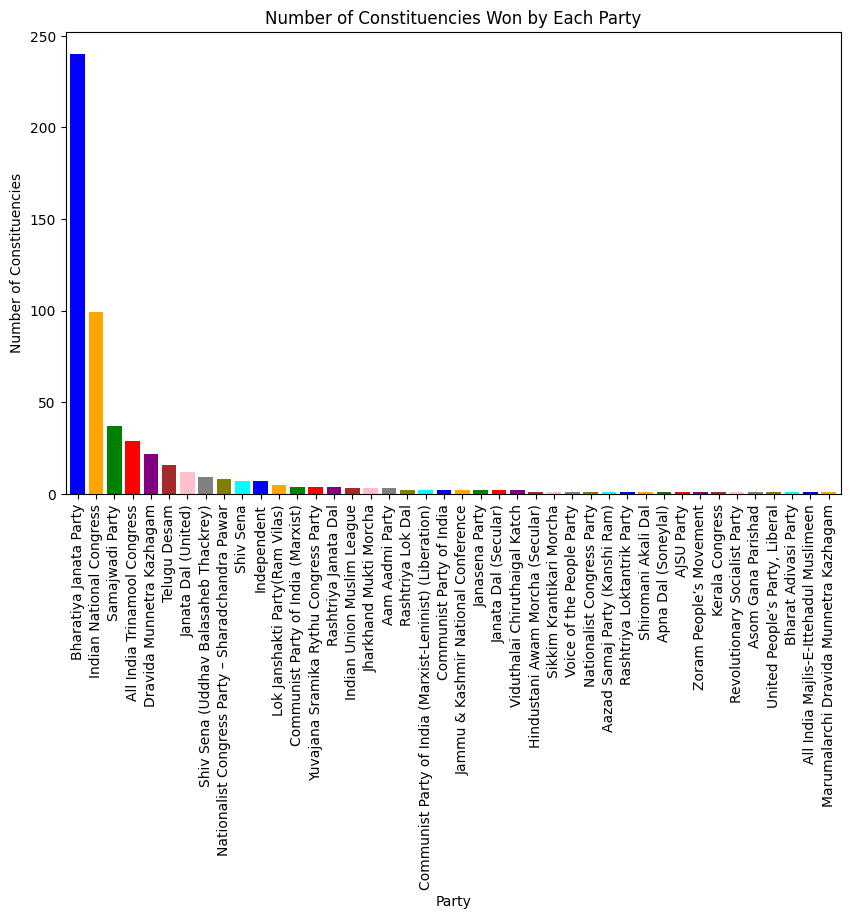

In [108]:
constituencies_per_party = data['Leading Party'].value_counts()
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'] * (len(constituencies_per_party) // 10 + 1)
constituencies_per_party.plot(kind='bar', width=0.8,color=colors[:len(constituencies_per_party)])
plt.title('Number of Constituencies Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Constituencies')
plt.show()


3. Top 10 trailing party by VOTE


In [4]:
data=pd.read_csv('Data.csv')
trailing_party_votes = data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = data['Trailing Party'].value_counts()

C:\Users\Arya\AppData\Local\Temp\ipykernel_18772\3359737546.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette=colors)
C:\Users\Arya\AppData\Local\Temp\ipykernel_18772\3359737546.py:6: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  ax=sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette=colors)


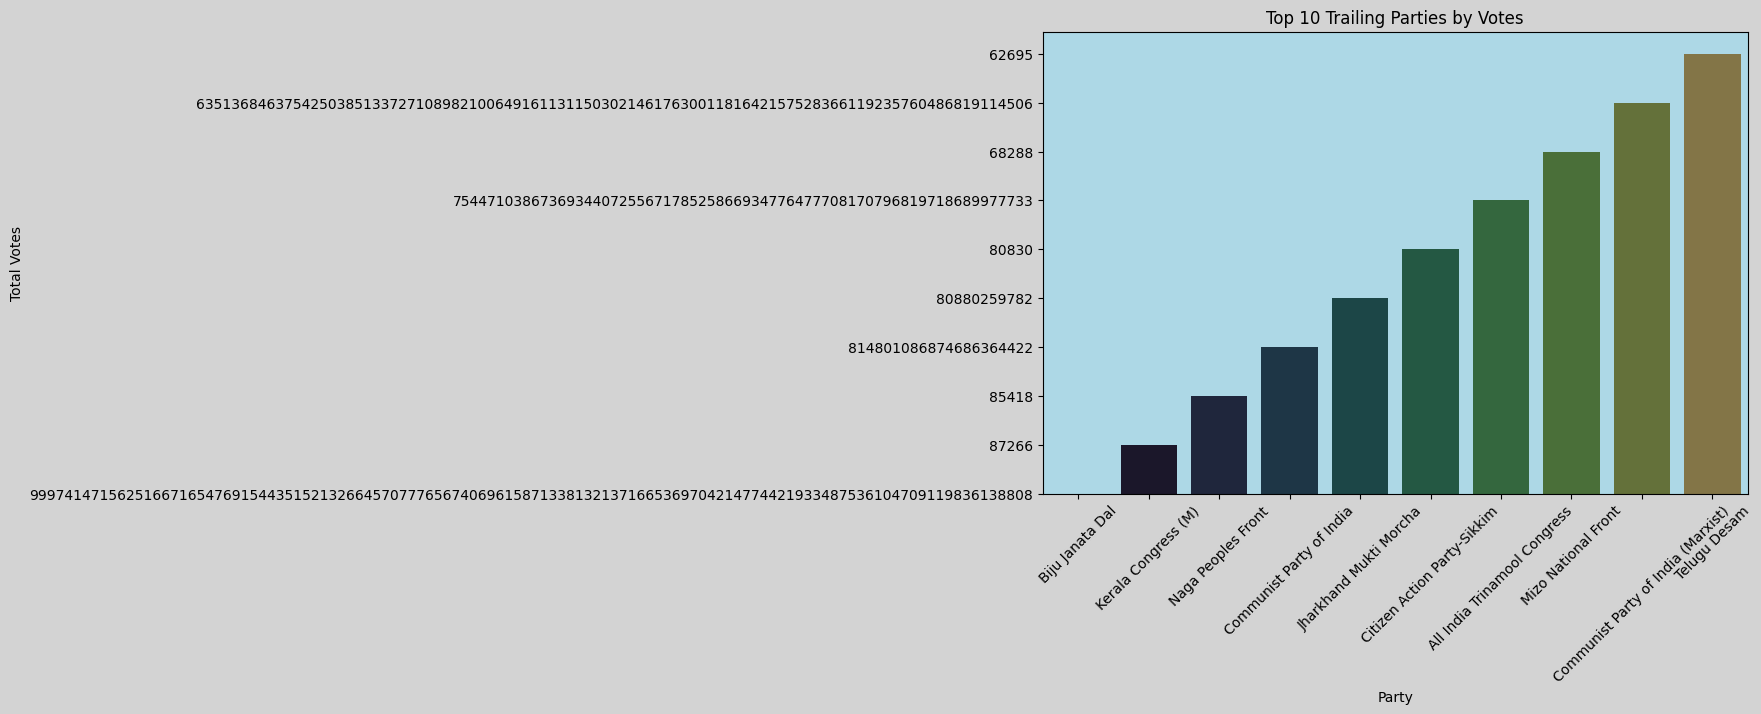

In [96]:
plt.figure(figsize=(20, 6))

# Plot votes distribution by trailing party
plt.subplot(1, 2, 1)
colors = sns.color_palette("cubehelix", 20)
ax=sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette=colors)
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.gca().invert_yaxis()
plt.xticks(rotation=45)

ax.set_facecolor('lightblue')
plt.gcf().set_facecolor('lightgrey')
plt.show()



4. Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah

C:\Users\Arya\AppData\Local\Temp\ipykernel_18772\240151659.py:33: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax=sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette=colors,width=0.55)


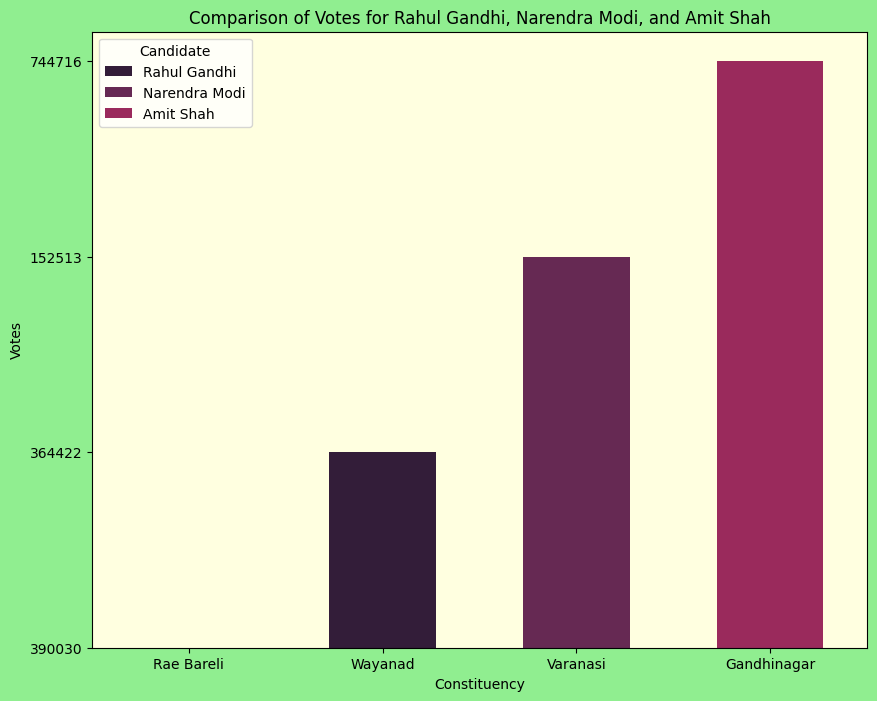

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rahul_entries = data[data['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries = data[data['Leading Candidate'] == 'NARENDRA MODI']
amit_entries = data[data['Leading Candidate'] == 'AMIT SHAH']

# Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_votes = rahul_entries['Margin'].values
modi_votes = modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes = amit_entries['Margin'].values[0] if not amit_entries.empty else 0

# Get the original constituency names for Rahul Gandhi
rahul_constituencies = list(rahul_entries['Constituency'])

# Get the original constituency name for Narendra Modi
modi_constituency = modi_entries['Constituency'].values[0] if not modi_entries.empty else "Modi Constituency"

# Get the original constituency name for Amit Shah
amit_constituency = amit_entries['Constituency'].values[0] if not amit_entries.empty else "Amit Shah Constituency"

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': ['Rahul Gandhi'] * len(rahul_votes) + ['Narendra Modi', 'Amit Shah'],
    'Constituency': rahul_constituencies + [modi_constituency, amit_constituency],
    'Votes': list(rahul_votes) + [modi_votes, amit_votes]
})

# Plot the comparison
plt.figure(figsize=(10, 8))
colors = sns.color_palette("rocket")
ax=sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette=colors,width=0.55)
plt.title('Comparison of Votes for Rahul Gandhi, Narendra Modi, and Amit Shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=0)
plt.gca().invert_yaxis() # Ensure y-axis starts from zero with some padding

ax.set_facecolor('lightyellow')
plt.gcf().set_facecolor('lightgreen')
plt.show()


5. Votes distribution by party

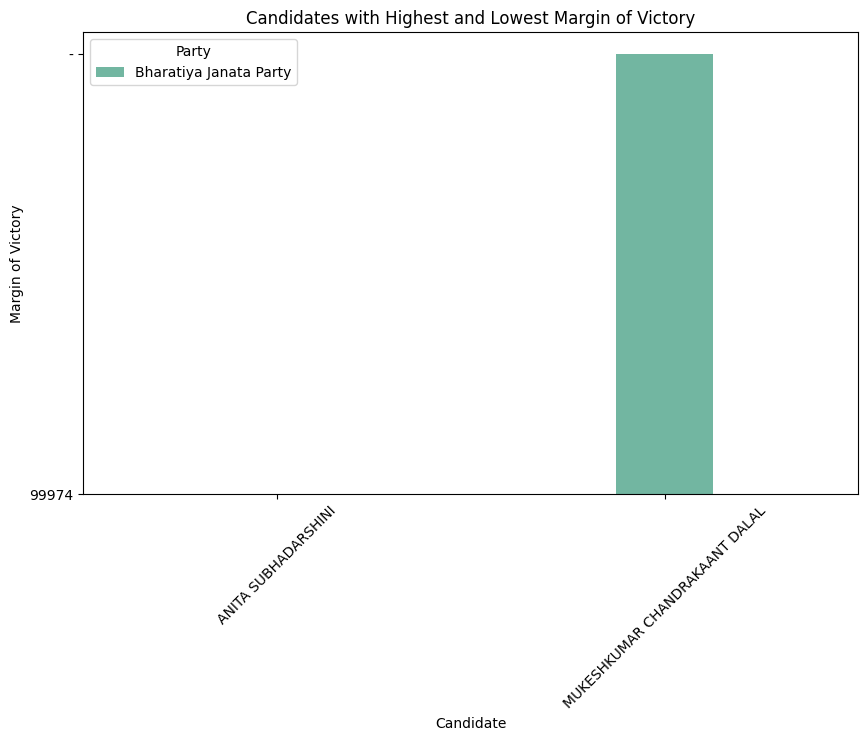

In [193]:
highest_margin_entry = data.loc[data['Margin'].idxmax()]
lowest_margin_entry = data.loc[data['Margin'].idxmin()]

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': [highest_margin_entry['Leading Candidate'], lowest_margin_entry['Leading Candidate']],
    'Party': [highest_margin_entry['Leading Party'], lowest_margin_entry['Leading Party']],
    'Margin': [highest_margin_entry['Margin'], lowest_margin_entry['Margin']]
})

# Plot the comparison
plt.figure(figsize=(10, 6))
sns.color_palette("hls", 8)
sns.barplot(data=data_to_plot, x='Candidate', y='Margin', hue='Party', palette='Set2',width=0.25)
plt.title('Candidates with Highest and Lowest Margin of Victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

6. Margin of victory for leading Party

C:\Users\Arya\AppData\Local\Temp\ipykernel_18772\3165540564.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Leading Party', y='Margin', palette='tab10')


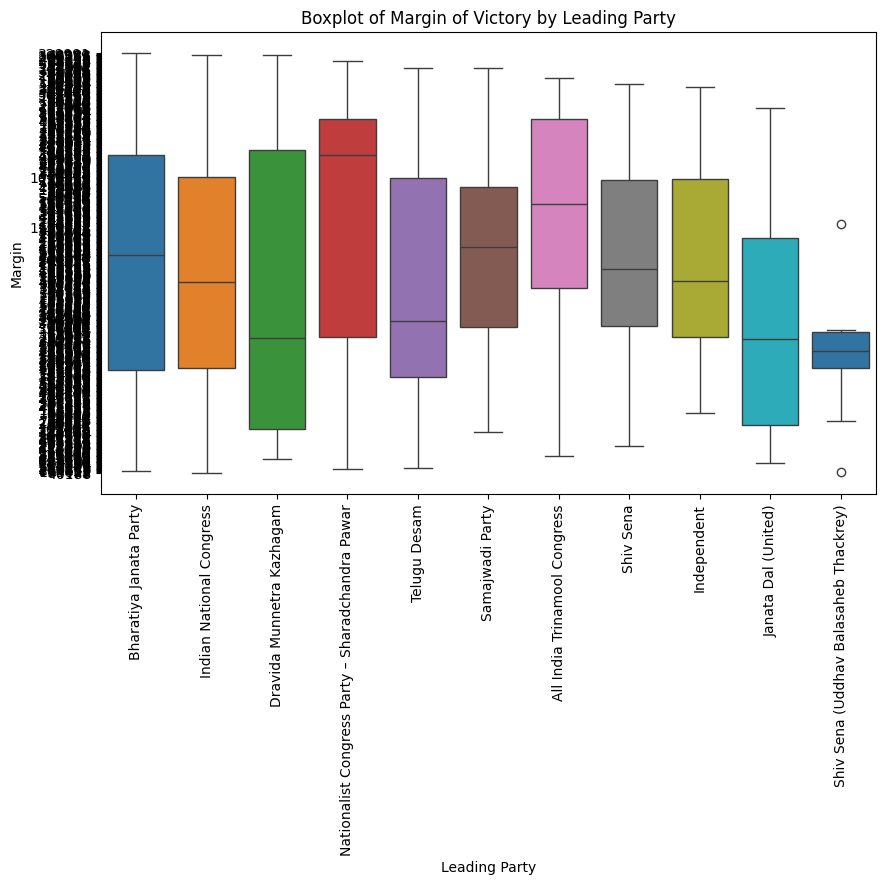

In [172]:
profound_parties = data['Leading Party'].value_counts() > 5
profound_parties = profound_parties[profound_parties].index

# Filter the data
filtered_data = data[data['Leading Party'].isin(profound_parties)]

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Leading Party', y='Margin', palette='tab10')
plt.title('Boxplot of Margin of Victory by Leading Party')
plt.xlabel('Leading Party')
plt.ylabel('Margin')
plt.xticks(rotation=90)


plt.show()


7. Count of Result Status

C:\Users\Arya\AppData\Local\Temp\ipykernel_18772\1785248462.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Status', palette='crest',width=0.45)


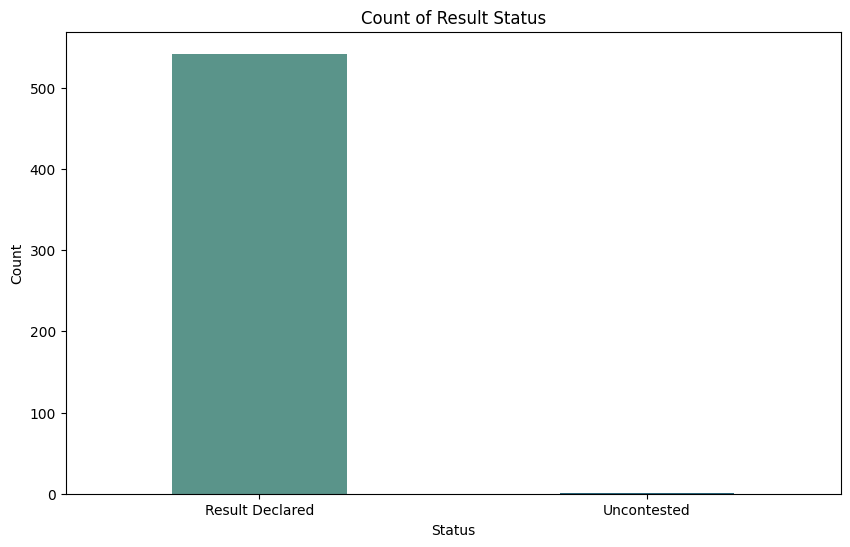

In [228]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Status', palette='crest',width=0.45)
plt.title('Count of Result Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

8. Distribution of Leading Parties

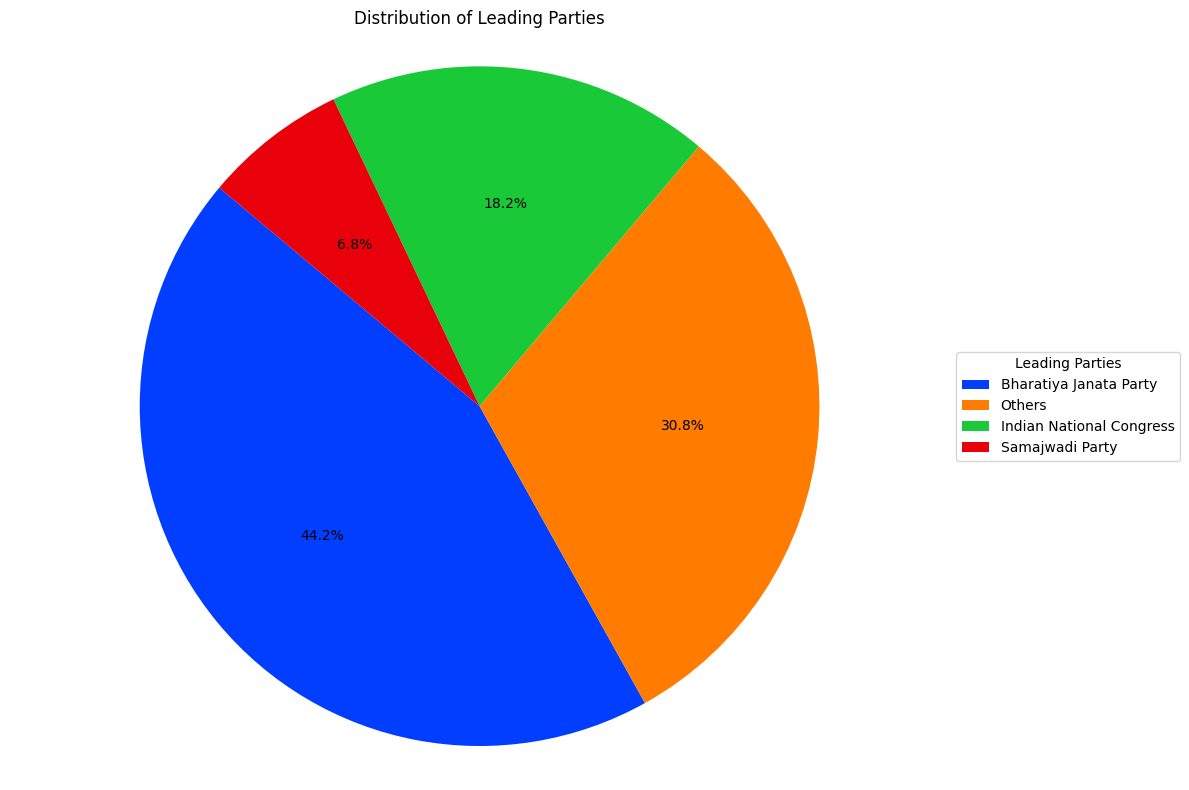

In [6]:


leading_party_counts = data['Leading Party'].value_counts()

# Use a distinct color palette
colors = sns.color_palette("bright")
threshold= 10

fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(
    leading_party_counts, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors
)

# Create legend
ax.legend(wedges, leading_party_counts.index, title="Leading Parties", loc="center left", bbox_to_anchor=(1, 0.5))

# Set the title and equal aspect ratio
plt.title('Distribution of Leading Parties')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [8]:
import squarify

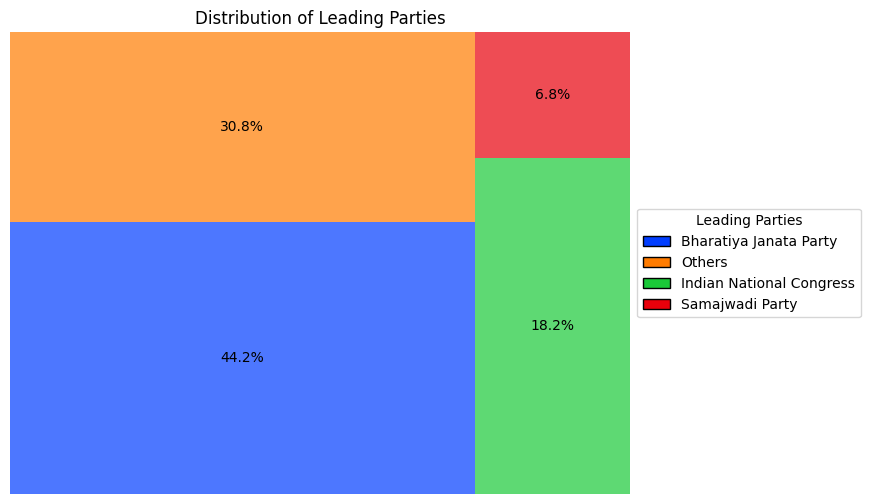

In [9]:
olors = sns.color_palette("bright", len(leading_party_counts))

# Calculate percentages
percentages = (leading_party_counts / leading_party_counts.sum()) * 100

# Plotting the treemap
plt.figure(figsize=(8, 6))  # Reduce the figure size
squarify.plot(sizes=leading_party_counts.values, label=percentages.apply(lambda x: f"{x:.1f}%"), color=colors, alpha=0.7, text_kwargs={'fontsize': 10})  # Reduce the font size

# Remove the axes
plt.axis('off')

# Add a separate color legend
legend_handles = [plt.Rectangle((0,0), 1, 1, color=colors[i], ec="k") for i in range(len(leading_party_counts))]
plt.legend(legend_handles, leading_party_counts.index, title="Leading Parties", loc="center left", bbox_to_anchor=(1, 0.5))

# Set the title
plt.title('Distribution of Leading Parties')

# Show the plot
plt.show()


9. Leading Parties with their respective counts

C:\Users\Arya\AppData\Local\Temp\ipykernel_18772\1833733809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=filtered_data, x='Leading Party',palette=colors)
C:\Users\Arya\AppData\Local\Temp\ipykernel_18772\1833733809.py:3: UserWarning: 
The palette list has fewer values (6) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax=sns.countplot(data=filtered_data, x='Leading Party',palette=colors)


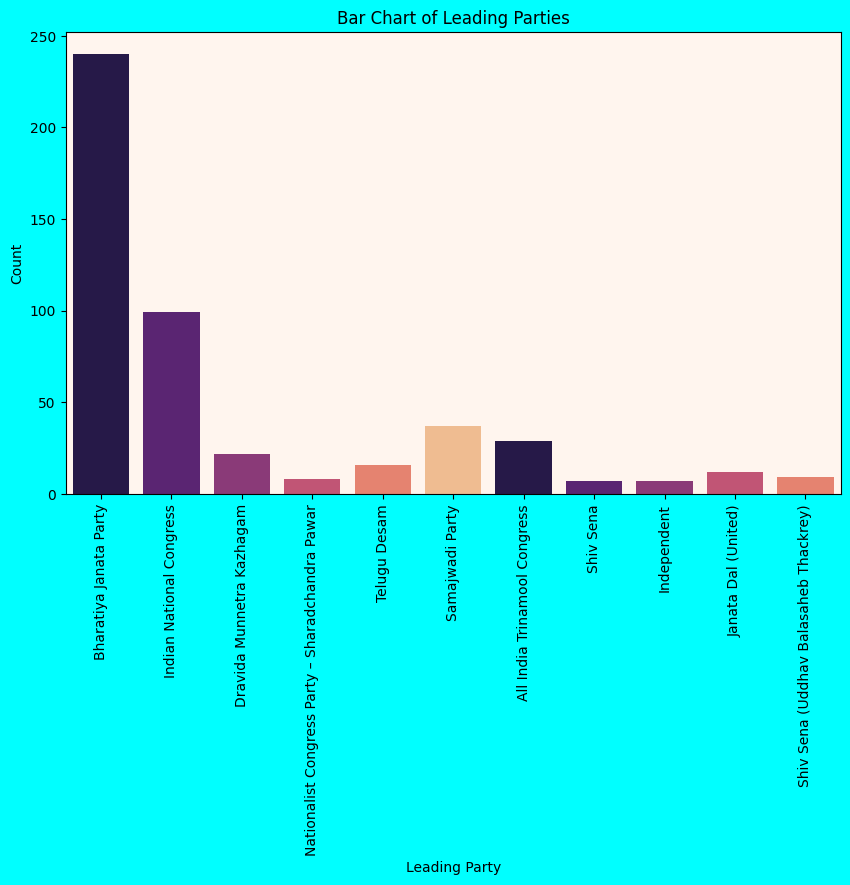

In [188]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("magma")
ax=sns.countplot(data=filtered_data, x='Leading Party',palette=colors)
plt.title('Bar Chart of Leading Parties')
plt.xlabel('Leading Party')
plt.ylabel('Count')
plt.xticks(rotation=90)
ax.set_facecolor('seashell')
plt.gcf().set_facecolor('cyan')
plt.show()


10. Highest and lowest Victory Candidate

C:\Users\Arya\AppData\Local\Temp\ipykernel_18772\2101876187.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette=colors)


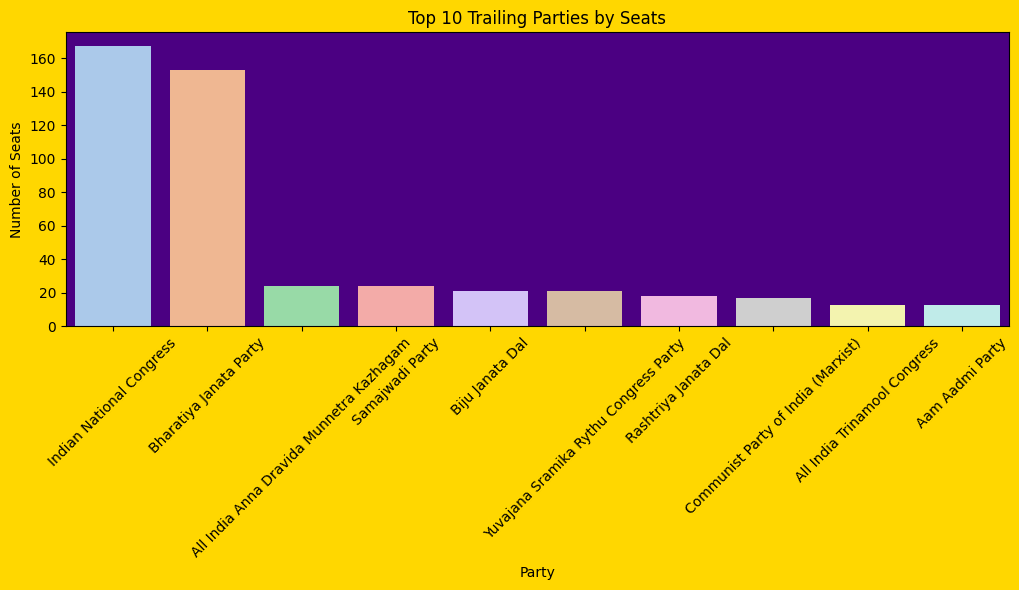

In [219]:
plt.figure(figsize=(20, 6))

# Create subplot (1 row, 2 columns), select the second plot
plt.subplot(1, 2, 2)

# Plotting using seaborn barplot
colors = sns.color_palette("pastel")
ax = sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette=colors)

# Customize plot labels and appearance
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
ax.set_facecolor('indigo')  # Set background color of the plot area
plt.gcf().set_facecolor('gold')  # Set background color of the figure

plt.tight_layout()

plt.show()

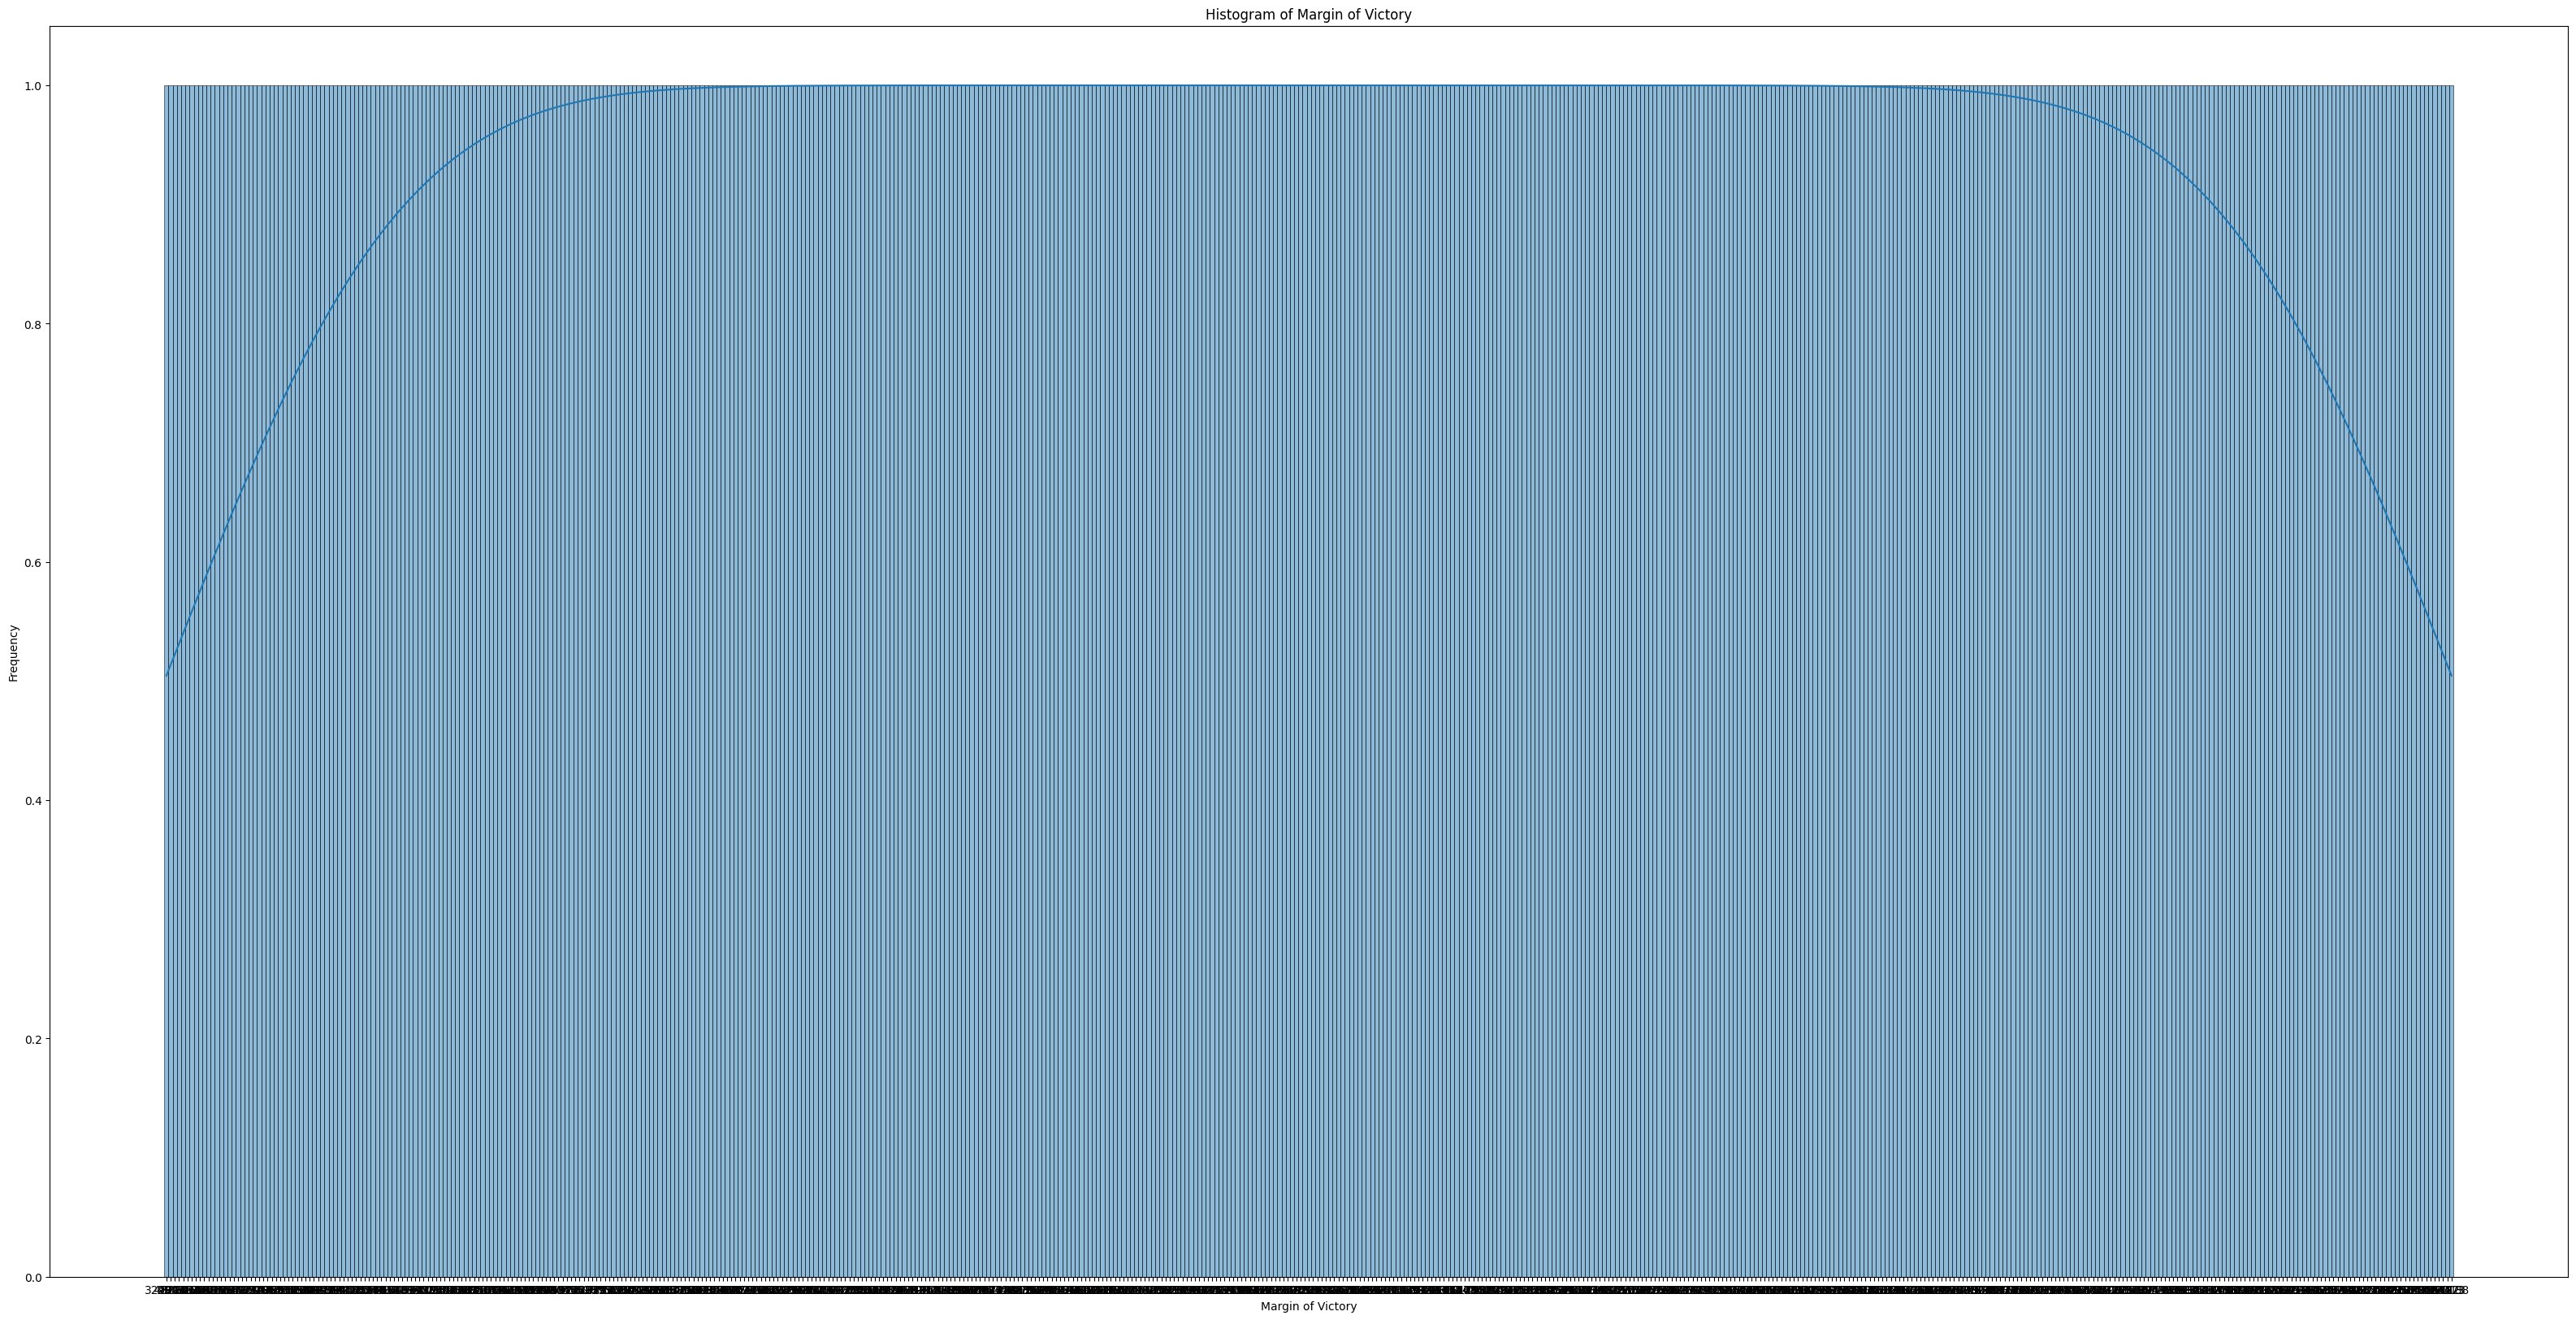

In [222]:
plt.figure(figsize=(40, 20))
sns.histplot(data['Margin'], bins=2, kde=True)
plt.title('Histogram of Margin of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()